# Part 3: company clustering customers




### Silhouette Method with Kmeans clustering

First, we will use the Silhouette Method from sklearn to determine the best number of clusters.

I will run the sklearn silhouette_score from the range 1-10.

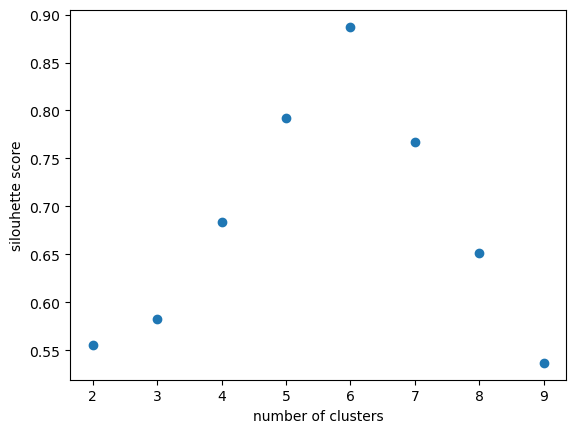

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.cluster as cluster
from sklearn import metrics
import pandas as pd
import seaborn as sns

data = np.load("data.npy")

K = range(1, 10)
silouhette_scores = dict()

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=8, random_state=1).fit(data)
    if (k <= 1):
        continue
    labels = kmeans.labels_
    silouhette_scores[k] = metrics.silhouette_score(data, labels, metric='euclidean')

plt.plot(K[1:], silouhette_scores.values(), "o")
plt.xlabel("number of clusters")
plt.ylabel("silouhette score")
plt.show()


As we can see from the above plot, 6 clusters is clearly the biggest silhouette score, therefore we will now use 6 as the input number of clusters and do the Kmeans clustering method.

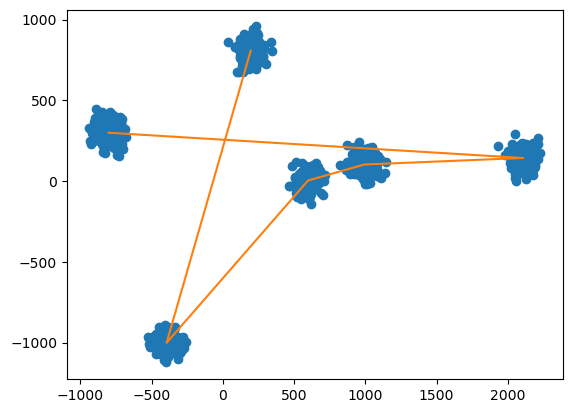

In [32]:

kmeans = cluster.KMeans(n_clusters=6, n_init=8, random_state=0).fit(data)
x_data = data[:, 0]
y_data = data[:, 1]
plt.plot(x_data, y_data, "o")
centroids = kmeans.cluster_centers_
x_cluster = centroids[:, 0]
y_cluster = centroids[:, 1]
plt.plot(x_cluster, y_cluster)
plt.show()

# Elbow Method with Clustering

Next, we will determine the number of clusters with elbow method.


<AxesSubplot: xlabel='Clusters', ylabel='WSS'>

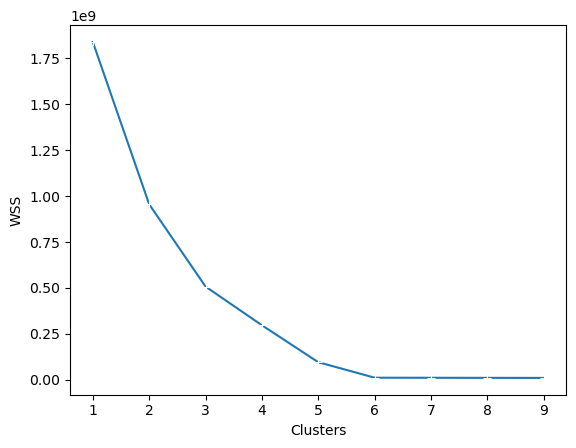

In [34]:
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++").fit(data)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

sns.lineplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="+")

As we can see from the above Elbow plot, the optimal number of clusters is also 6. Now, we will


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:370: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:648: RuntimeWarning: overflow encountered in square
  lloyd_iter(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:379: ConvergenceWarning: Number of

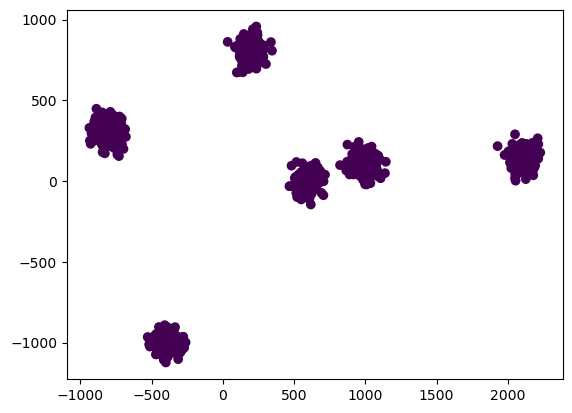

In [38]:

sc = cluster.SpectralClustering(n_clusters=6).fit(data)
labels = sc.labels_

plt.scatter(data[:,0], data[:,1], c=labels)
plt.show()  
